<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/Bagging_Boostrap_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA ENSEMBLES ---
html_ensembles = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles en Machine Learning: Fundamentos</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #89f7fe 0%, #66a6ff 100%);
      --success-gradient: linear-gradient(135deg, #89f7fe 0%, #66a6ff 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #66a6ff;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(102, 166, 255, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(102, 166, 255, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensembles en Machine Learning</h1>

    <div class="accordion-container">
      <!-- 1. Introducción -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es un Modelo de Ensamble?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Un ensamble es una técnica de aprendizaje automático que combina <strong>múltiples modelos individuales</strong> (denominados modelos base o clasificadores débiles) para producir una predicción agregada, que normalmente supera el rendimiento de cualquier modelo individual.</p>
          <h4>Motivación: ¿Por qué usar ensambles?</h4>
          <ul>
              <li>Los modelos individuales tienden a cometer errores diferentes.</li>
              <li>Si se combinan correctamente, estos errores pueden compensarse mutuamente.</li>
              <li>La predicción combinada puede tener menor error total, gracias a la reducción de varianza o sesgo (según el tipo de ensamble).</li>
          </ul>
        </div>
      </div>

      <!-- 2. Explicación de la Imagen -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Explicación del Proceso de Ensamble</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El proceso esquemático de un ensamble por votación (común en clasificación) es el siguiente:</p>
            <ol>
                <li><strong>Training Set:</strong> Se parte de un mismo conjunto de datos para entrenar múltiples modelos.</li>
                <li><strong>Clasificadores $C_1, C_2, \\dots, C_m$:</strong> Se entrenan varios modelos de clasificación de forma independiente.</li>
                <li><strong>Predicciones Individuales $P_1, P_2, \\dots, P_m$:</strong> Cada modelo hace su predicción individual.</li>
                <li><strong>Mecanismo de Votación:</strong> Las predicciones se combinan mediante votación mayoritaria.</li>
                <li><strong>Resultado Final $P_f$:</strong> La predicción final del ensamble es la clase que recibe más votos.</li>
            </ol>
        </div>
      </div>

      <!-- 3. Importancia de la Diversidad -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Importancia de la Diversidad entre Modelos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Un punto crucial es que la <strong>diversidad</strong> entre modelos es esencial. Si todos los modelos son muy parecidos entre sí (correlacionados), no aportan información nueva, y el ensamble no mejora el rendimiento significativamente.</p>
            <h4>Factores que Inducen Diversidad:</h4>
            <ul>
                <li><strong>Diferencia en los Datos:</strong> Entrenar modelos sobre subconjuntos distintos (ej. bootstrap en Bagging).</li>
                <li><strong>Algoritmos Diferentes:</strong> Usar árboles, SVM, redes neuronales, etc., en el mismo ensamble.</li>
                <li><strong>Hipótesis Diferente:</strong> Variar los hiperparámetros de cada modelo (profundidad, regularización, etc.).</li>
            </ul>
        </div>
      </div>

      <!-- 4. Riesgo de Falta de Diversidad -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Riesgo: Falta de Diversidad</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
           <p>Cuando los modelos del ensamble usan la misma estructura, se entrenan con datos idénticos y tienen hipótesis similares, tienden a cometer los mismos errores. En este caso, la agregación no logra reducir el error general.</p>
        </div>
      </div>

      <!-- 5. Tipos Comunes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos Comunes de Ensambles</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Tipo de Ensamble</th><th>Principio Clave</th><th>¿Aporta Diversidad?</th></tr></thead>
              <tbody>
                <tr><td><strong>Bagging</strong></td><td>Bootstrap + promedio/voto</td><td>Sí, a través de muestras distintas.</td></tr>
                <tr><td><strong>Random Forest</strong></td><td>Bagging + selección aleatoria de atributos</td><td>Sí, por muestras y variables distintas.</td></tr>
                <tr><td><strong>Boosting</strong></td><td>Modelos secuenciales que corrigen errores previos</td><td>No, el enfoque es la corrección, no la diversidad.</td></tr>
                <tr><td><strong>Stacking</strong></td><td>Combina predicciones de modelos base con otro</td><td>Sí, al usar modelos base diferentes.</td></tr>
                <tr><td><strong>Voting Classifier</strong></td><td>Voto entre modelos diversos</td><td>Sí, si se usan modelos variados.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión General</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Los ensambles son una forma de aprovechar la colaboración entre múltiples modelos para mejorar la precisión, reducir la varianza o incluso corregir sesgos. Sin embargo, su efectividad depende críticamente de la <strong>diversidad</strong> entre los modelos participantes. Esta diversidad puede lograrse mediante datos, algoritmos o estructuras distintas.</p>
          <blockquote>La idea central es que al combinar múltiples modelos no correlacionados, sus errores aleatorios se cancelan, resultando en una predicción final más robusta y precisa.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_ensembles))

Tipo de Ensamble,Principio Clave,¿Aporta Diversidad?
Bagging,Bootstrap + promedio/voto,"Sí, a través de muestras distintas."
Random Forest,Bagging + selección aleatoria de atributos,"Sí, por muestras y variables distintas."
Boosting,Modelos secuenciales que corrigen errores previos,"No, el enfoque es la corrección, no la diversidad."
Stacking,Combina predicciones de modelos base con otro,"Sí, al usar modelos base diferentes."
Voting Classifier,Voto entre modelos diversos,"Sí, si se usan modelos variados."


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA Y CORREGIDA ---
html_bagging_final = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Análisis de Bagging (Bootstrap Aggregating)</title>

  <!-- Fuentes y Iconos -->
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <!-- MathJax Configuration -->
  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams', 'newcommand', 'configmacros']}
      },
      svg: {
        fontCache: 'global',
        displayAlign: 'center',
        displayIndent: '0em'
      },
      startup: {
        ready: () => {
          MathJax.startup.defaultReady();
        }
      }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    /* --- VARIABLES CSS PERSONALIZADAS --- */
    :root {
      --primary-gradient: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
      --secondary-gradient: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
      --success-gradient: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #4facfe;
      --accent-secondary: #00f2fe;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-sm: 0 2px 4px rgba(0, 0, 0, 0.05);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-md: 12px;
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; font-size: 16px; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; user-select: none; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; user-select: none; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.6s cubic-bezier(0.4, 0, 0.2, 1), padding 0.6s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; font-size: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content ul { padding-left: 1.5rem; margin-bottom: 1rem; }
    .topic-content li { margin-bottom: 0.5rem; }
    .steps-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .step { display: flex; align-items: flex-start; gap: 1rem; padding: 1.5rem; background: rgba(79, 172, 254, 0.05); border-radius: var(--radius-md); border: 1px solid rgba(79, 172, 254, 0.1); transition: var(--transition-normal); position: relative; overflow: hidden; }
    .step::before { content: ''; position: absolute; top: 0; left: 0; width: 4px; height: 100%; background: var(--success-gradient); }
    .step:hover { transform: translateX(4px); box-shadow: var(--shadow-md); }
    .step-number { flex-shrink: 0; width: 48px; height: 48px; background: var(--success-gradient); color: white; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: 700; font-size: 1.25rem; box-shadow: var(--shadow-sm); }
    .step-description p { margin-bottom: 0.5rem; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: var(--radius-md); text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; position: relative; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(79, 172, 254, 0.08); border-radius: 0 var(--radius-md) var(--radius-md) 0; font-style: italic; position: relative; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: var(--radius-md); border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; font-size: 0.9rem; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(79, 172, 254, 0.1); font-weight: 600; color: var(--text-primary); text-transform: uppercase; letter-spacing: 0.05em; }
    .topic-content tr:hover { background: rgba(79, 172, 254, 0.05); }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
    @media (max-width: 768px) { .main-container { padding: 1rem; } .topic-header { padding: 1.25rem 1.5rem; } .topic-card.active .topic-content { padding: 1.5rem; } .theme-toggle { top: 1rem; right: 1rem; width: 48px; height: 48px; } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema">
    <i class="fas fa-moon" id="themeIcon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Bagging: Bootstrap Aggregating</h1>

    <div class="accordion-container">
      <!-- Tarjeta 1: Fundamento Estadístico -->
      <div class="topic-card" data-topic="fundamento">
        <div class="topic-header">
          <span class="topic-title"><div class="topic-icon"><i class="fas fa-calculator"></i></div>Fundamento Estadístico</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <h4>Bootstrap Sampling</h4>
          <p>El bootstrap es una técnica de remuestreo que crea nuevas muestras a partir de una original, <strong>con reemplazo</strong> y de igual tamaño. Este proceso genera diversidad entre los modelos entrenados.</p>
          <h4>Agregación (Aggregating)</h4>
          <p>Se combinan las predicciones de los modelos. Para <strong>regresión</strong>, se promedia la salida:</p>
          <div class="formula-block">$$\\hat{f}(x) = \\frac{1}{B} \\sum_{b=1}^{B} f^{(b)}(x)$$</div>
          <p>Para <strong>clasificación</strong>, se usa el voto por mayoría:</p>
          <div class="formula-block">$$\\hat{y}(x) = \\text{modo}\\{f^{(1)}(x), f^{(2)}(x), \\ldots, f^{(B)}(x)\\}$$</div>
        </div>
      </div>

      <!-- Tarjeta 2: Funcionamiento Interno -->
      <div class="topic-card" data-topic="funcionamiento">
        <div class="topic-header">
          <span class="topic-title"><div class="topic-icon"><i class="fas fa-cogs"></i></div>Funcionamiento Paso a Paso</span>
          <i class="fas fa-chevron-down expand-icon"></i>
        </div>
        <div class="topic-content">
          <div class="steps-container">
            <div class="step"><div class="step-number">1</div><div class="step-description"><h4>Dataset Original</h4><p>Se parte de un conjunto de entrenamiento $D = \\{(x_i, y_i)\\}_{i=1}^n$.</p></div></div>
            <div class="step"><div class="step-number">2</div><div class="step-description"><h4>Muestreo Bootstrap</h4><p>Se generan $B$ subconjuntos $D^{(1)}, \\ldots, D^{(B)}$ mediante muestreo con reemplazo desde $D$.</p></div></div>
            <div class="step"><div class="step-number">3</div><div class="step-description"><h4>Entrenamiento</h4><p>Se entrena un modelo $f^{(b)}$ independiente en cada subconjunto $D^{(b)}$.</p></div></div>
            <div class="step"><div class="step-number">4</div><div class="step-description"><h4>Agregación</h4><p>Para una nueva entrada $x$, se obtienen las predicciones $f^{(1)}(x), \\ldots, f^{(B)}(x)$.</p></div></div>
            <div class="step"><div class="step-number">5</div><div class="step-description"><h4>Predicción Final</h4><p>El resultado agregado (promedio o voto) es la predicción final del ensamble.</p></div></div>
          </div>
        </div>
      </div>

      <!-- Tarjeta 3: Propiedades y Beneficios -->
      <div class="topic-card" data-topic="propiedades">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-star"></i></div>Propiedades y Beneficios</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>🔹 Reducción de Varianza</h4><p>Es el principal beneficio. La agregación promedia los errores no sistemáticos, reduciendo la varianza del modelo final.</p>
          <h4>🔹 Estabilidad</h4><p>Hace que modelos inestables (como árboles profundos) se vuelvan más robustos.</p>
          <h4>🔹 Paralelización</h4><p>Los modelos se pueden entrenar simultáneamente, acelerando el proceso.</p>
        </div>
      </div>

      <!-- Tarjeta 4: Aplicaciones Comunes -->
      <div class="topic-card" data-topic="aplicaciones">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-tree"></i></div>Aplicaciones Comunes</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p><strong>Árboles de decisión:</strong> El modelo base más común debido a su alta varianza.</p>
          <blockquote>El caso más emblemático es <strong>Random Forest</strong>, que añade más aleatoriedad al proceso.</blockquote>
        </div>
      </div>

      <!-- Tarjeta 5: Comparación con Boosting -->
      <div class="topic-card" data-topic="comparacion">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-balance-scale"></i></div>Comparación con Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Aspecto</th><th>Bagging</th><th>Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Combinación</strong></td><td>Promedio / Voto uniforme</td><td>Suma ponderada adaptativa</td></tr>
                <tr><td><strong>Objetivo</strong></td><td>Reducir varianza</td><td>Reducir sesgo</td></tr>
                <tr><td><strong>Entrenamiento</strong></td><td>Paralelo, independiente</td><td>Secuencial, dependiente</td></tr>
                <tr><td><strong>Riesgo de overfit</strong></td><td>Menor</td><td>Mayor (si no se controla)</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- Tarjeta 6: Limitaciones -->
      <div class="topic-card" data-topic="limitaciones">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-exclamation-triangle"></i></div>Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li><strong>No mejora el sesgo:</strong> Si el modelo base es muy sesgado, Bagging no lo corregirá.</li>
            <li><strong>Beneficio en modelos inestables:</strong> Aporta poco a modelos ya estables (ej. k-NN).</li>
            <li><strong>Costo computacional:</strong> Requiere entrenar B modelos, aunque es paralelizable.</li>
          </ul>
        </div>
      </div>

      <!-- Tarjeta 7: Conclusión -->
      <div class="topic-card" data-topic="conclusion">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-check-circle"></i></div>Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>Bagging es una técnica de ensamble elegante y potente que reduce la varianza para crear modelos más robustos y confiables, siendo la base de algoritmos tan importantes como Random Forest.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Bagging mejora la generalización al reducir la varianza mediante la combinación de modelos entrenados sobre subconjuntos bootstrap del dataset original.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por <span class="author">profesor Sergio Gevatschnaider</span></p></div>
  </div>

  <script>
    (function() {
      // --- THEME TOGGLE ---
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) {
          themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon';
        }
      }
      themeToggle.addEventListener('click', () => {
        const newTheme = bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark';
        setTheme(newTheme);
      });
      setTheme(localStorage.getItem('theme') || 'dark');

      // --- ACCORDION LOGIC WITH MATHJAX FIX ---
      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          const isActive = card.classList.contains('active');

          // Optional: close all other cards
          // document.querySelectorAll('.topic-card').forEach(c => c.classList.remove('active'));

          if (!isActive) {
            card.classList.add('active');
            // Re-render MathJax only on the content that just became visible
            if (window.MathJax && card.querySelector('.topic-content')) {
                MathJax.typesetPromise([card.querySelector('.topic-content')]).catch((err) => console.log('MathJax typeset error:', err));
            }
          } else {
             card.classList.remove('active');
          }
        });
      });

      // --- CANVAS PARTICLE SYSTEM ---
      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;

        function setCanvasSize() {
          canvas.width = window.innerWidth;
          canvas.height = window.innerHeight;
        }

        class Particle {
          constructor() {
            this.x = Math.random() * canvas.width;
            this.y = Math.random() * canvas.height;
            this.size = Math.random() * 2 + 1;
            this.speedX = Math.random() * 1 - 0.5;
            this.speedY = Math.random() * 1 - 0.5;
            const theme = document.body.getAttribute('data-theme') || 'dark';
            this.color = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)';
          }
          update() {
            if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX;
            if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY;
            this.x += this.speedX;
            this.y += this.speedY;
          }
          draw() {
            ctx.fillStyle = this.color;
            ctx.beginPath();
            ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2);
            ctx.fill();
          }
        }

        function initParticles() {
          particles = [];
          for (let i = 0; i < particleCount; i++) {
            particles.push(new Particle());
          }
        }

        function animateParticles() {
          ctx.clearRect(0, 0, canvas.width, canvas.height);
          particles.forEach(p => {
            p.update();
            p.draw();
          });
          requestAnimationFrame(animateParticles);
        }

        window.addEventListener('resize', () => {
          setCanvasSize();
          initParticles();
        });

        setCanvasSize();
        initParticles();
        animateParticles();
      }

      // --- INITIAL STATE ---
      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch((err) => console.log('MathJax initial typeset error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_bagging_final))

Aspecto,Bagging,Boosting
Combinación,Promedio / Voto uniforme,Suma ponderada adaptativa
Objetivo,Reducir varianza,Reducir sesgo
Entrenamiento,"Paralelo, independiente","Secuencial, dependiente"
Riesgo de overfit,Menor,Mayor (si no se controla)


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA Y CORREGIDA ---
html_bootstrap_theory = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Teoría Estadística del Bootstrap</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' },
      startup: { ready: () => { MathJax.startup.defaultReady(); } }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
      --success-gradient: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #4facfe;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; font-size: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content ul { padding-left: 1.5rem; }
    .topic-content li { margin-bottom: 0.5rem; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(79, 172, 254, 0.08); border-radius: 0 12px 12px 0; font-style: italic; position: relative; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; font-size: 0.9rem; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(79, 172, 254, 0.1); font-weight: 600; color: var(--text-primary); text-transform: uppercase; letter-spacing: 0.05em; }
    .topic-content tr:last-child td { border-bottom: none; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
    @media (max-width: 768px) { .main-container { padding: 1rem; } .theme-toggle { top: 1rem; right: 1rem; width: 48px; height: 48px; } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema">
    <i class="fas fa-moon" id="themeIcon"></i>
  </div>

  <div class="main-container">
    <h1 class="main-title">Teoría Estadística del Bootstrap</h1>

    <div class="accordion-container">
      <!-- Tarjeta 1: ¿Qué es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-info-circle"></i></div>¿Qué es el método Bootstrap?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El Bootstrap es un método de remuestreo propuesto por Bradley Efron en 1979, que permite estimar la <strong>distribución muestral</strong> de un estadístico (media, mediana, etc.) a partir de una sola muestra, sin suposiciones fuertes sobre la distribución poblacional.</p>
          <blockquote>Esencialmente, el Bootstrap responde: ¿Qué tan variable sería mi estadístico si pudiera volver a muestrear de la población muchas veces?</blockquote>
          <p>Como no tenemos acceso a la población, usamos la muestra original como una "pseudopoblación", generando nuevas muestras con reemplazo para simular ese proceso.</p>
        </div>
      </div>

      <!-- Tarjeta 2: Proceso -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-project-diagram"></i></div>Proceso del Bootstrap Clásico</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>1. Muestreo con Reemplazo</h4>
          <p>Dado un dataset $X = \\{x_1, x_2, \\dots, x_n\\}$, generamos $B$ muestras bootstrap $X^{*1}, X^{*2}, \\dots, X^{*B}$, cada una de tamaño $n$, seleccionando al azar con reemplazo desde $X$.</p>
          <h4>2. Cálculo del Estadístico</h4>
          <p>Para cada muestra bootstrap $X^{*b}$, se calcula el estadístico de interés $\\hat{\\theta}^{*b} = t(X^{*b})$.</p>
          <h4>3. Distribución Empírica</h4>
          <p>Se obtiene una distribución empírica del estadístico: $\\{\\hat{\\theta}^{*1}, \\hat{\\theta}^{*2}, \\dots, \\hat{\\theta}^{*B}\\}$.</p>
          <h4>4. Inferencia</h4>
          <p>A partir de esta distribución, podemos estimar el <strong>error estándar</strong>:</p>
          <div class="formula-block">$$ \\text{SE}(\\hat{\\theta}) \\approx \\sqrt{\\frac{1}{B-1} \\sum_{b=1}^{B} (\\hat{\\theta}^{*b} - \\bar{\\theta}^*)^2} $$</div>
          <p>O construir <strong>intervalos de confianza</strong> por el método del percentil:</p>
          <div class="formula-block">$$ [\\theta^*_{(\\alpha/2)}, \\theta^*_{(1-\\alpha/2)}] $$</div>
        </div>
      </div>

      <!-- Tarjeta 3: Intuición -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-lightbulb"></i></div>¿Por qué funciona? (Intuición)</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Aunque no conocemos la población, la muestra contiene información valiosa. Al muestrear con reemplazo de la muestra original:</p>
            <ul>
                <li>Se simula el efecto de obtener múltiples muestras de la población real.</li>
                <li>Se reproduce la variabilidad estadística inherente al estimador.</li>
                <li>Se evita la necesidad de supuestos fuertes como la normalidad de la población.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 4: Fundamentos Teóricos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-book"></i></div>Fundamentos Teóricos Formales</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El Bootstrap es consistente bajo ciertas condiciones de regularidad. El resultado más general es que la distribución empírica bootstrap converge en probabilidad a la verdadera distribución del estadístico. Esto significa que a medida que el tamaño de la muestra original $n$ crece, la aproximación bootstrap se vuelve cada vez más precisa.</p>
        </div>
      </div>

      <!-- Tarjeta 5: Condiciones de Validez -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-check-double"></i></div>Condiciones de Validez</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El Bootstrap no siempre funciona. Sus principales condiciones son:</p>
            <div class="table-container">
                <table>
                  <thead><tr><th>Requisito</th><th>Explicación</th></tr></thead>
                  <tbody>
                    <tr><td>✅ Muestra representativa</td><td>La muestra original debe reflejar adecuadamente la población.</td></tr>
                    <tr><td>✅ Tamaño muestral adecuado</td><td>Si $n$ es muy pequeño, el remuestreo no captura suficiente variabilidad.</td></tr>
                    <tr><td>✅ Estadístico "suave"</td><td>Funciona mejor con estadísticas como la media o mediana que con extremos como el mínimo o máximo.</td></tr>
                    <tr><td>🚫 Independencia de datos</td><td>El bootstrap clásico asume independencia. Para datos correlacionados (series temporales), se usan variantes como el Block Bootstrap.</td></tr>
                  </tbody>
                </table>
            </div>
        </div>
      </div>

      <!-- Tarjeta 6: Variantes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-code-branch"></i></div>Variantes del Bootstrap</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Paramétrico:</strong> Se asume una forma funcional para la población (ej. normal) y se simula desde ella.</li>
                <li><strong>Block Bootstrap:</strong> Adaptado a datos con dependencia temporal, remuestreando bloques de datos.</li>
                <li><strong>BCa (Bias-Corrected and Accelerated):</strong> Genera intervalos de confianza más precisos corrigiendo sesgo.</li>
                <li><strong>Wild Bootstrap:</strong> Para modelos de regresión con heterocedasticidad.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 7: Aplicaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-chart-line"></i></div>Aplicaciones Típicas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>🧠 Ejemplo Conceptual</h4>
            <blockquote>Supón que tienes los salarios anuales de 100 personas y deseas estimar el intervalo de confianza para la mediana, pero no puedes asumir normalidad. <strong>¿Qué haces?</strong> Usas bootstrap: remuestras 10,000 veces, calculas la mediana en cada muestra y tomas el percentil 2.5 y 97.5 como los extremos del intervalo.</blockquote>
            <h4>Usos Comunes</h4>
            <ul>
                <li>Estimación de intervalos de confianza cuando no hay fórmula exacta.</li>
                <li>Validación de modelos estadísticos y de machine learning.</li>
                <li>Estimación de sesgo o varianza de un estimador.</li>
            </ul>
        </div>
      </div>

      <!-- Tarjeta 8: Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-flag-checkered"></i></div>Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>El Bootstrap es un método de remuestreo robusto, flexible y no paramétrico que permite estimar incertidumbre en estadísticos complejos a partir de una sola muestra, simulando el proceso de muestreo repetido. Su éxito se debe a su simplicidad, su base estadística sólida y su aplicabilidad en contextos donde los métodos clásicos fallan.</p>
          <h4>Concepto Clave</h4>
          <blockquote>El Bootstrap es una técnica de inferencia basada en simulación que estima la variabilidad de un estadístico mediante remuestreos con reemplazo de la muestra original.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => {
        const newTheme = bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark';
        setTheme(newTheme);
      });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          const isActive = card.classList.contains('active');
          if (!isActive) {
            card.classList.add('active');
            if (window.MathJax && card.querySelector('.topic-content')) {
                MathJax.typesetPromise([card.querySelector('.topic-content')]).catch((err) => console.log('MathJax typeset error:', err));
            }
          } else {
             card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() {
            this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height;
            this.size = Math.random() * 2 + 1;
            this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5;
          }
          update() {
            if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX;
            if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY;
            this.x += this.speedX; this.y += this.speedY;
          }
          draw(theme) {
            ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)';
            ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill();
          }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() {
          const currentTheme = document.body.getAttribute('data-theme') || 'dark';
          ctx.clearRect(0, 0, canvas.width, canvas.height);
          particles.forEach(p => { p.update(); p.draw(currentTheme); });
          requestAnimationFrame(animateParticles);
        }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch((err) => console.log('MathJax initial typeset error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_bootstrap_theory))

Requisito,Explicación
✅ Muestra representativa,La muestra original debe reflejar adecuadamente la población.
✅ Tamaño muestral adecuado,"Si $n$ es muy pequeño, el remuestreo no captura suficiente variabilidad."
"✅ Estadístico ""suave""",Funciona mejor con estadísticas como la media o mediana que con extremos como el mínimo o máximo.
🚫 Independencia de datos,"El bootstrap clásico asume independencia. Para datos correlacionados (series temporales), se usan variantes como el Block Bootstrap."


Iniciando el proceso Bootstrap con 10000 simulaciones...
Proceso Bootstrap finalizado.


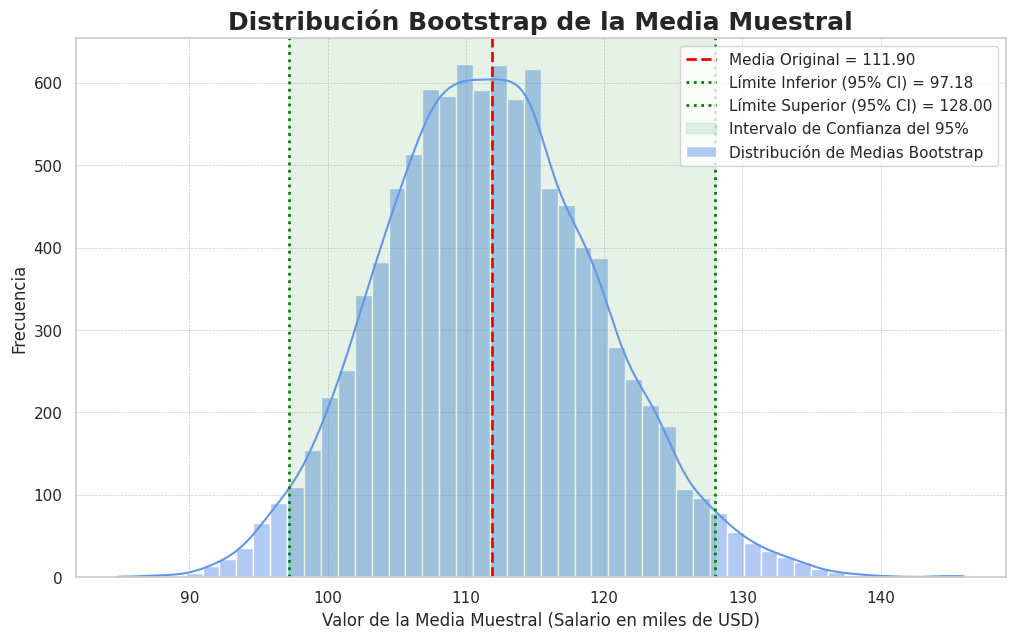


--- Resultados de la Inferencia Bootstrap ---
Media de la muestra original: 111.9048
Error Estándar estimado por Bootstrap: 7.8218
Sesgo estimado por Bootstrap: -0.0609
Intervalo de Confianza del 95% para la media: [97.1811, 127.9983]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Configuración y Datos Originales ---
# Usemos una semilla para que los resultados sean siempre los mismos y se puedan replicar.
np.random.seed(42)

# Creamos nuestra "muestra original". Imaginemos que son los salarios anuales (en miles de USD)
# de 150 empleados. Usamos una distribución log-normal porque los salarios suelen tener un sesgo a la derecha.
# Esto hace que el Bootstrap sea especialmente útil, ya que no podemos asumir normalidad.
datos_originales = np.random.lognormal(mean=4.5, sigma=0.8, size=150)
n = len(datos_originales)

# Calculamos la media de nuestra muestra original. Este es nuestro mejor "punto de partida".
media_original = np.mean(datos_originales)


# --- 2. Proceso de Remuestreo Bootstrap ---
# Definimos el número de muestras bootstrap que vamos a generar. Un número alto (miles) es lo ideal.
B = 10000
# Creamos una lista vacía para guardar la media de cada muestra bootstrap.
bootstrap_medias = []

# Este es el corazón del método Bootstrap:
print(f"Iniciando el proceso Bootstrap con {B} simulaciones...")
for i in range(B):
    # a) Muestreo con reemplazo: Creamos una nueva muestra del mismo tamaño que la original.
    muestra_bootstrap = np.random.choice(datos_originales, size=n, replace=True)

    # b) Cálculo del estadístico: Calculamos la media de esta nueva muestra.
    media_bootstrap = np.mean(muestra_bootstrap)

    # c) Guardamos el resultado.
    bootstrap_medias.append(media_bootstrap)

print("Proceso Bootstrap finalizado.")

# Convertimos la lista a un array de NumPy para facilitar los cálculos.
bootstrap_medias = np.array(bootstrap_medias)


# --- 3. Inferencia a partir de la Distribución Bootstrap ---
# Ahora que tenemos la distribución empírica de la media, podemos calcular lo que nos interesa.

# a) Error Estándar: Es simplemente la desviación estándar de nuestra distribución de medias bootstrap.
#    Mide qué tan variable es nuestro estimador (la media).
error_estandar_bootstrap = np.std(bootstrap_medias, ddof=1) # ddof=1 para muestra

# b) Sesgo (Bias): Mide si nuestro estimador original tiende a sobreestimar o subestimar el valor.
sesgo_bootstrap = np.mean(bootstrap_medias) - media_original

# c) Intervalo de Confianza (Método del Percentil): Es la forma más intuitiva.
#    Simplemente tomamos los percentiles que encierran el 95% central de nuestra distribución.
alpha = 0.05 # Para un 95% de confianza
limite_inferior = np.percentile(bootstrap_medias, 100 * (alpha / 2))
limite_superior = np.percentile(bootstrap_medias, 100 * (1 - alpha / 2))


# --- 4. Visualización Atractiva de los Resultados ---
# Usamos Seaborn para un estilo más limpio y profesional.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Histograma de la distribución de las medias bootstrap
sns.histplot(bootstrap_medias, bins=50, kde=True, color="cornflowerblue", label="Distribución de Medias Bootstrap")

# Líneas verticales para marcar los puntos clave
plt.axvline(media_original, color='red', linestyle='--', linewidth=2, label=f'Media Original = {media_original:.2f}')
plt.axvline(limite_inferior, color='green', linestyle=':', linewidth=2, label=f'Límite Inferior (95% CI) = {limite_inferior:.2f}')
plt.axvline(limite_superior, color='green', linestyle=':', linewidth=2, label=f'Límite Superior (95% CI) = {limite_superior:.2f}')

# Sombrear el área del intervalo de confianza para mayor claridad
plt.axvspan(limite_inferior, limite_superior, color='green', alpha=0.1, label='Intervalo de Confianza del 95%')

# Títulos y etiquetas
plt.title('Distribución Bootstrap de la Media Muestral', fontsize=18, fontweight='bold')
plt.xlabel('Valor de la Media Muestral (Salario en miles de USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostramos el gráfico
plt.show()

# --- 5. Imprimir Resultados ---
print("\n--- Resultados de la Inferencia Bootstrap ---")
print(f"Media de la muestra original: {media_original:.4f}")
print(f"Error Estándar estimado por Bootstrap: {error_estandar_bootstrap:.4f}")
print(f"Sesgo estimado por Bootstrap: {sesgo_bootstrap:.4f}")
print(f"Intervalo de Confianza del 95% para la media: [{limite_inferior:.4f}, {limite_superior:.4f}]")

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA RANDOM FOREST ---
html_random_forest = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Random Forest: Desarrollo Teórico Completo</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true,
        packages: {'[+]': ['ams']} // 'ams' package is needed for \\underbrace
      },
      svg: { fontCache: 'global' },
      startup: { ready: () => { MathJax.startup.defaultReady(); } }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #2af598 0%, #009efd 100%);
      --success-gradient: linear-gradient(135deg, #2af598 0%, #009efd 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #009efd;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }.topic-card:nth-child(9) { animation-delay: 0.9s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); display: flex; align-items: center; gap: 0.75rem; }
    .topic-icon { width: 32px; height: 32px; border-radius: 50%; background: var(--success-gradient); display: flex; align-items: center; justify-content: center; color: white; font-size: 0.875rem; }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; color: var(--text-primary); margin-bottom: 1rem; display: flex; align-items: center; gap: 0.5rem; }
    .topic-content h4::before { content: ''; width: 4px; height: 20px; background: var(--accent-primary); border-radius: 2px; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    [data-theme="dark"] .formula-block { background: rgba(255, 255, 255, 0.05); }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(0, 158, 253, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(0, 158, 253, 0.1); font-weight: 600; text-transform: uppercase; letter-spacing: 0.05em; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Random Forest: Desarrollo Teórico Completo</h1>

    <div class="accordion-container">
      <!-- 1. Introducción -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-lightbulb"></i></div>Introducción Conceptual</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Random Forest es un algoritmo de <strong>ensemble learning</strong> que combina la estrategia de <strong>Bagging</strong> (bootstrap + agregación) con la <strong>aleatorización en la selección de atributos</strong>, para construir una colección de árboles de decisión que, unidos, forman un modelo robusto y preciso.</p>
          <blockquote>“Muchos árboles débiles e inestables pueden juntarse para formar un modelo fuerte y estable, si se entrenan con diversidad.”</blockquote>
        </div>
      </div>

      <!-- 2. Fundamentos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-layer-group"></i></div>Fundamentos Estadísticos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>Bagging como Base Estructural</h4><p>Cada árbol del bosque es entrenado sobre un subconjunto bootstrap de los datos, lo que genera variabilidad inicial entre los árboles.</p>
            <h4>Aumento de Diversidad (El "Random" en Random Forest)</h4><p>A diferencia del Bagging puro, en cada nodo de cada árbol, se selecciona un <strong>subconjunto aleatorio de características</strong> ($k < m$) para decidir la división. Esto evita que árboles diferentes aprendan patrones idénticos y es la clave para descorrelacionarlos.</p>
        </div>
      </div>

      <!-- 3. Algoritmo -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-list-ol"></i></div>Algoritmo Paso a Paso</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Dado un dataset $D = \\{(x_i, y_i)\\}_{i=1}^n$ con $m$ características, y elegidos los hiperparámetros $B$ (nº de árboles) y $k$ (nº de atributos por división):</p>
            <p><strong>Para cada árbol $b=1, \\dots, B$:</strong></p>
            <ol>
                <li>Crear una muestra bootstrap $D^{(b)}$ de tamaño $n$ a partir de $D$.</li>
                <li>Construir un árbol de decisión sobre $D^{(b)}$: en cada división, elegir aleatoriamente $k$ de las $m$ variables y seleccionar la mejor división <strong>solo dentro de ese subconjunto</strong>.</li>
            </ol>
            <p><strong>Para una nueva observación $x$:</strong></p>
            <ul>
                <li><strong>Clasificación:</strong> se toma la clase más votada entre los $B$ árboles.</li>
                <li><strong>Regresión:</strong> se promedia la salida de los $B$ árboles.</li>
            </ul>
        </div>
      </div>

      <!-- 4. Fórmulas Clave -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-calculator"></i></div>Fórmulas Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Predicción en Regresión</h4>
          <div class="formula-block">$$ \\hat{f}(x) = \\frac{1}{B} \\sum_{b=1}^{B} f^{(b)}(x) $$</div>
          <h4>Descomposición del Error Esperado</h4>
          <p>El error de un ensamble se puede descomponer. Random Forest busca minimizar la covarianza para reducir el error general:</p>
          <div class="formula-block">$$ \\text{Error}(x) = \\underbrace{\\text{Sesgo}^2}_{\\text{sistemático}} + \\underbrace{\\text{Varianza}}_{\\text{dispersión}} - \\underbrace{\\text{Covarianza}}_{\\text{diversidad}} $$</div>
        </div>
      </div>

      <!-- 5. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-star"></i></div>Ventajas Teóricas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Explicación</th></tr></thead>
              <tbody>
                <tr><td>🎯 Precisión Alta</td><td>Suele superar a modelos individuales en la mayoría de tareas.</td></tr>
                <tr><td>🧠 No Requiere Normalización</td><td>Es insensible a la escala de las variables.</td></tr>
                <tr><td>📉 Robusto al Overfitting</td><td>La agregación de múltiples árboles reduce el sobreajuste.</td></tr>
                <tr><td>🎲 Resistente al Ruido</td><td>El promedio de múltiples modelos mitiga el impacto de outliers.</td></tr>
                <tr><td>🔍 Estimación de Importancia</td><td>Provee métricas internas de importancia de variables y error OOB.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-exclamation-triangle"></i></div>Limitaciones Teóricas</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Limitación</th><th>Implicación</th></tr></thead>
              <tbody>
                <tr><td>🔄 Modelo "Caja Negra"</td><td>Es más difícil de interpretar que un único árbol de decisión.</td></tr>
                <tr><td>🐢 Costoso Computacionalmente</td><td>Entrenar muchos árboles grandes puede ser lento y consumir memoria.</td></tr>
                <tr><td>🧮 No Extrapola Bien</td><td>En regresión, no puede predecir valores fuera del rango de entrenamiento.</td></tr>
                <tr><td>⚖️ Sesgo con Variables Irrelevantes</td><td>Si hay muchas variables sin información, pueden diluir la señal.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 7. Validación Interna -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-recycle"></i></div>Estimación OOB (Out-of-Bag)</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Una ventaja crucial del Random Forest es que permite estimar el error de generalización sin necesidad de validación cruzada. Cuando se genera cada muestra bootstrap, alrededor del <strong>36.8%</strong> de los datos quedan fuera (out-of-bag, OOB). Se puede usar esta porción para evaluar el rendimiento de los árboles que no la vieron, obteniendo un estimador insesgado del error de generalización.</p>
        </div>
      </div>

      <!-- 8. Comparación -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-balance-scale"></i></div>Comparación con Otros Métodos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Método</th><th>Reduce Varianza</th><th>Reduce Sesgo</th><th>Tuning Complejo</th><th>Paralelizable</th></tr></thead>
              <tbody>
                <tr><td>Árbol Único</td><td>❌</td><td>❌</td><td>✅</td><td>✅</td></tr>
                <tr><td>Bagging</td><td>✅</td><td>❌</td><td>❌</td><td>✅</td></tr>
                <tr><td>Boosting</td><td>❌</td><td>✅</td><td>✅</td><td>❌</td></tr>
                <tr><td><strong>Random Forest</strong></td><td><strong>✅✅</strong></td><td>❌</td><td>❌</td><td>✅</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 9. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title"><div class="topic-icon"><i class="fas fa-flag-checkered"></i></div>Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>Random Forest es un algoritmo de ensamble que combina múltiples árboles de decisión entrenados sobre muestras bootstrap y con aleatoriedad en la selección de atributos. Su base teórica se sustenta en la reducción de varianza a través del bagging y en la diversificación estructural de modelos mediante selección aleatoria de variables. Es una herramienta potente, robusta y validada para clasificación y regresión.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Random Forest es una técnica de aprendizaje en conjunto que reduce la varianza y mejora la generalización, al combinar árboles de decisión diversos y entrenados sobre subconjuntos aleatorios de datos y atributos.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax && card.querySelector('.topic-content')) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        setTimeout(() => {
          if (window.MathJax) {
            MathJax.typesetPromise([firstCard.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
          }
        }, 100);
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_random_forest))

Ventaja,Explicación
🎯 Precisión Alta,Suele superar a modelos individuales en la mayoría de tareas.
🧠 No Requiere Normalización,Es insensible a la escala de las variables.
📉 Robusto al Overfitting,La agregación de múltiples árboles reduce el sobreajuste.
🎲 Resistente al Ruido,El promedio de múltiples modelos mitiga el impacto de outliers.
🔍 Estimación de Importancia,Provee métricas internas de importancia de variables y error OOB.
Limitación,Implicación
"🔄 Modelo ""Caja Negra""",Es más difícil de interpretar que un único árbol de decisión.
🐢 Costoso Computacionalmente,Entrenar muchos árboles grandes puede ser lento y consumir memoria.
🧮 No Extrapola Bien,"En regresión, no puede predecir valores fuera del rango de entrenamiento."
⚖️ Sesgo con Variables Irrelevantes,"Si hay muchas variables sin información, pueden diluir la señal."


Entrenando un Random Forest con 100 árboles...
Entrenamiento finalizado.

--- Resultados del Modelo ---
Precisión en el conjunto de prueba: 0.9000
Error Out-of-Bag (OOB) Score: 0.8714

Importancia de las características:
  - Característica 1: 0.6609
  - Característica 2: 0.3391


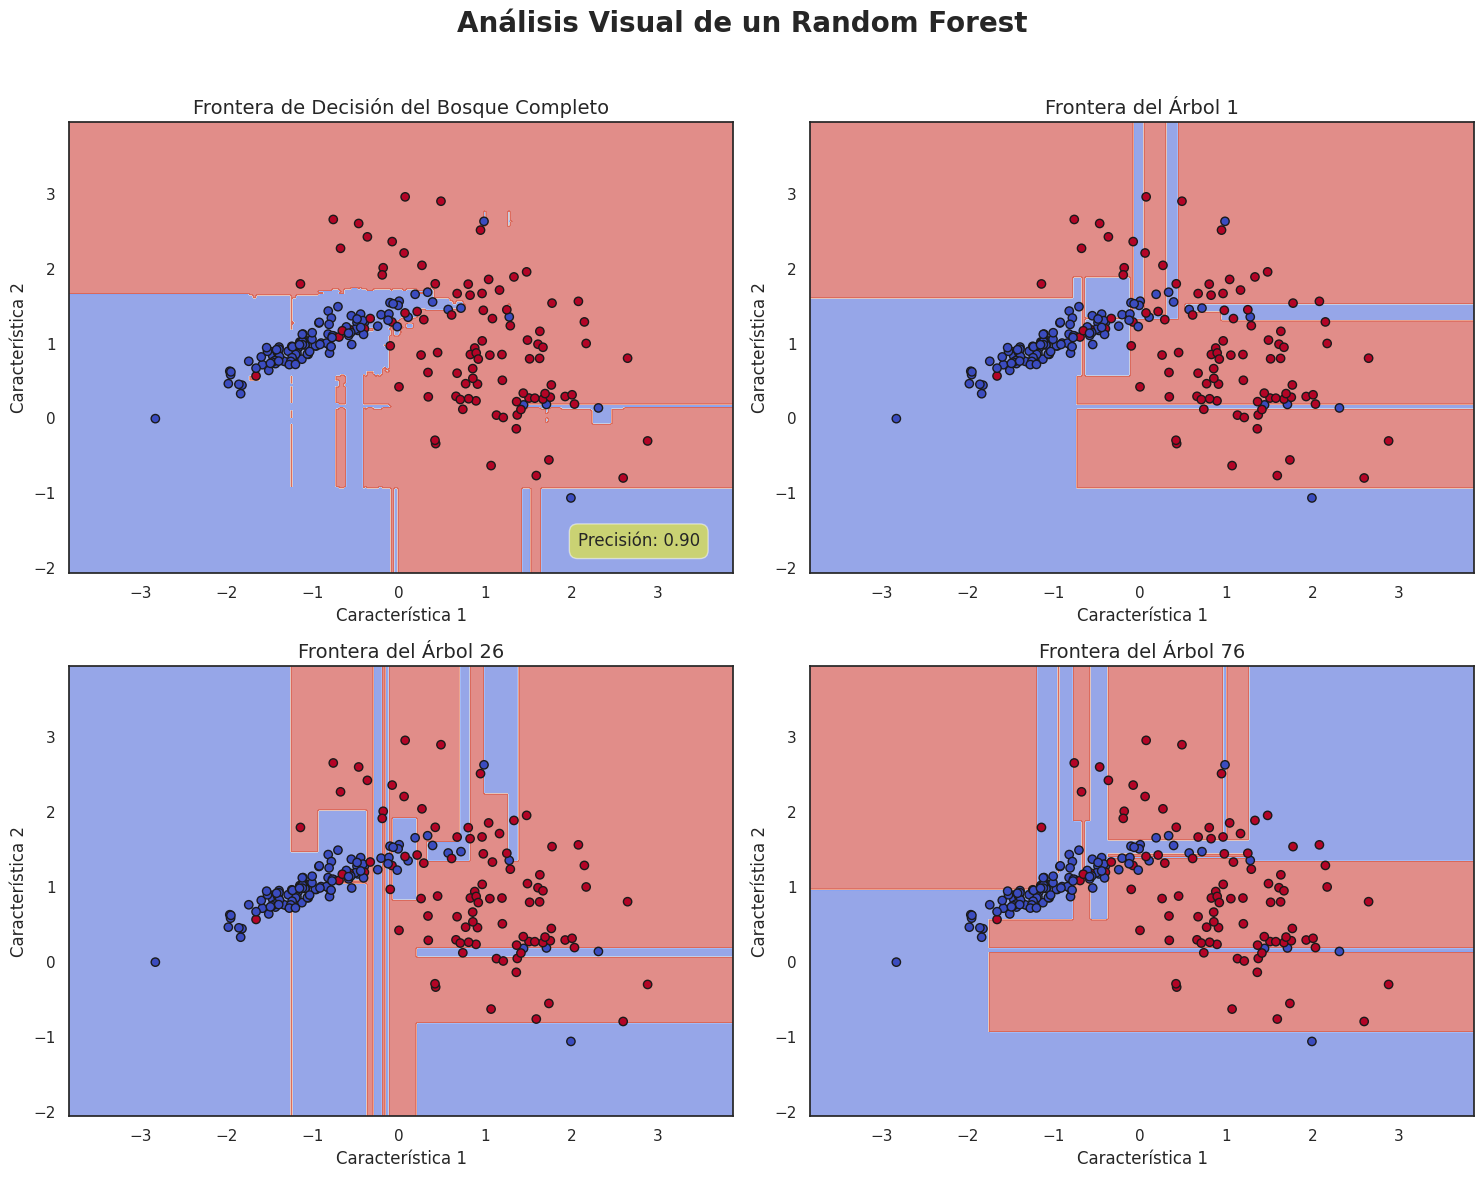

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Preparación de los Datos ---
# Generamos un conjunto de datos sintético para clasificación.
# Tener solo 2 características nos permite visualizar las fronteras de decisión.
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- 2. Creación y Entrenamiento del Modelo Random Forest ---
# Aquí aplicamos la teoría:
# n_estimators: El número de árboles en el bosque (B).
# max_features: El número de características a considerar en cada división (k). 'sqrt' es una regla común.
# oob_score=True: Para calcular el error Out-of-Bag, una validación interna gratuita gracias al bagging.
n_arboles = 100
modelo_rf = RandomForestClassifier(n_estimators=n_arboles,
                                   max_features='sqrt',
                                   oob_score=True,
                                   random_state=42)

print(f"Entrenando un Random Forest con {n_arboles} árboles...")
modelo_rf.fit(X_train, y_train)
print("Entrenamiento finalizado.")


# --- 3. Evaluación y Análisis Interno ---
# Hacemos predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print("\n--- Resultados del Modelo ---")
print(f"Precisión en el conjunto de prueba: {precision:.4f}")
# El OOB score es una estimación del rendimiento del modelo en datos no vistos,
# calculado usando los datos que no se incluyeron en el bootstrap de cada árbol.
print(f"Error Out-of-Bag (OOB) Score: {modelo_rf.oob_score_:.4f}")

# Importancia de las características
print("\nImportancia de las características:")
for i, importancia in enumerate(modelo_rf.feature_importances_):
    print(f"  - Característica {i+1}: {importancia:.4f}")


# --- 4. Visualización del Bosque y los Árboles ---
sns.set_theme(style="white")

# Función auxiliar para graficar las fronteras de decisión
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

# Creamos una figura para comparar el bosque completo con algunos árboles individuales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Visual de un Random Forest', fontsize=20, fontweight='bold')

# a) Graficamos la frontera de decisión del BOSQUE COMPLETO
plot_decision_boundary(X_train, y_train, modelo_rf, axes[0, 0], 'Frontera de Decisión del Bosque Completo')
axes[0, 0].text(0.95, 0.05, f'Precisión: {precision:.2f}', transform=axes[0,0].transAxes,
                fontsize=12, verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))


# b) Graficamos las fronteras de algunos ÁRBOLES INDIVIDUALES
# Accedemos a los estimadores (árboles) dentro del modelo entrenado.
arboles_a_mostrar = [modelo_rf.estimators_[0], modelo_rf.estimators_[25], modelo_rf.estimators_[75]]
titulos_arboles = ['Frontera del Árbol 1', 'Frontera del Árbol 26', 'Frontera del Árbol 76']
axes_planos = [axes[0, 1], axes[1, 0], axes[1, 1]]

for i, arbol in enumerate(arboles_a_mostrar):
    plot_decision_boundary(X_train, y_train, arbol, axes_planos[i], titulos_arboles[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA BOOSTING ---
html_boosting = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles: Boosting - Desarrollo Teórico</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #ff9a9e 0%, #fecfef 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #ff7e5f;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #e14fad 0%, #f9d423 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #f09819;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }.topic-card:nth-child(9) { animation-delay: 0.9s; }.topic-card:nth-child(10) { animation-delay: 1s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 0.8s cubic-bezier(0.4, 0, 0.2, 1), padding 0.8s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(255, 126, 95, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(255, 126, 95, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensembles: Boosting</h1>

    <div class="accordion-container">
      <!-- 1. ¿Qué es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es Boosting?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Boosting es una técnica de aprendizaje en conjunto cuyo objetivo es construir un modelo fuerte a partir de una <strong>secuencia de modelos débiles</strong> (ej. árboles muy poco profundos).</p>
          <p>Su diferencia clave con Bagging es que los modelos no se entrenan de forma independiente, sino de manera <strong>secuencial</strong>, de modo que cada modelo intenta corregir los errores del anterior.</p>
        </div>
      </div>

      <!-- 2. Principio Estadístico -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Principio Estadístico Subyacente</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Boosting se fundamenta en la idea de la <strong>reducción del sesgo</strong> del modelo. Mientras que Bagging reduce la varianza, Boosting se orienta a disminuir el sesgo al construir el modelo de forma aditiva y corregida.</p>
            <p>Desde una perspectiva funcional, Boosting puede verse como una técnica de optimización donde se construye una función $F(x)$ que se aproxima a la función objetivo $f(x)$ minimizando una función de pérdida $L(y, F(x))$.</p>
        </div>
      </div>

      <!-- 3. Funcionamiento General -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Funcionamiento General del Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El proceso general puede resumirse así:</p>
          <ol>
            <li>Se inicia con un modelo base $f_1(x)$.</li>
            <li>Se evalúan sus errores y se da más importancia a los ejemplos mal clasificados.</li>
            <li>Se entrena un nuevo modelo $f_2(x)$ enfocado en esos errores.</li>
            <li>Se repite para $T$ iteraciones.</li>
          </ol>
          <p>La predicción final es una combinación ponderada de todos los modelos $\\{f_1, \\dots, f_T\\}$, donde $\\alpha_t$ es el peso o confianza del modelo $t$:</p>
          <div class="formula-block">$$ \\hat{y}(x) = \\text{sign} \\left( \\sum_{t=1}^{T} \\alpha_t \\cdot f_t(x) \\right) \\quad (\\text{Clasificación}) $$</div>
          <div class="formula-block">$$ \\hat{y}(x) = \\sum_{t=1}^{T} \\alpha_t \\cdot f_t(x) \\quad (\\text{Regresión}) $$</div>
        </div>
      </div>

      <!-- 4. Dinámica del Re-pesado -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Dinámica del Re-pesado de Errores</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Una característica esencial es su mecanismo de reajuste de pesos. Después de cada iteración, los pesos $w_i$ de los ejemplos mal clasificados aumentan, y los de los bien clasificados disminuyen. Así, los modelos subsiguientes se centran cada vez más en los ejemplos más difíciles.</p>
        </div>
      </div>

      <!-- 5. Tipos Principales -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos Principales de Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>AdaBoost (Adaptive Boosting)</h4><p>El algoritmo original. Reajusta los pesos de los ejemplos en cada iteración y combina los clasificadores débiles de forma ponderada.</p>
            <h4>Gradient Boosting</h4><p>Un enfoque más general. En lugar de ajustar pesos, cada nuevo modelo se entrena para predecir los <strong>errores residuales</strong> del modelo anterior. Es análogo a un descenso por gradiente en el espacio de funciones.</p>
            <h4>XGBoost, LightGBM, CatBoost</h4><p>Son implementaciones modernas y altamente optimizadas de Gradient Boosting, conocidas por su eficiencia, regularización y manejo avanzado de datos.</p>
        </div>
      </div>

      <!-- 6. Clasificación vs Regresión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Clasificación vs. Regresión en Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>El enfoque subyacente es el mismo: cada modelo contribuye con un peso proporcional a su rendimiento. La diferencia está en cómo se combinan las predicciones finales: votos ponderados para clasificación y suma ponderada para regresión.</p>
        </div>
      </div>

      <!-- 7. Comparación Teórica -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparación Teórica: Bagging vs. Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Aspecto</th><th>Bagging</th><th>Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Entrenamiento</strong></td><td>Paralelo, independiente</td><td>Secuencial, dependiente</td></tr>
                <tr><td><strong>Objetivo Principal</strong></td><td>Reducir varianza</td><td>Reducir sesgo</td></tr>
                <tr><td><strong>Peso en Datos</strong></td><td>Igual en todos los modelos</td><td>Aumenta en ejemplos mal clasificados</td></tr>
                <tr><td><strong>Combinación</strong></td><td>Promedio / Mayoría simple</td><td>Suma / Mayoría ponderada</td></tr>
                <tr><td><strong>Riesgo de Overfitting</strong></td><td>Menor</td><td>Mayor (si no se regula)</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 8. Ventajas -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas Teóricas del Boosting</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li>Capacidad para aprender patrones complejos y no lineales.</li>
                <li>Fuerte rendimiento predictivo, a menudo el mejor "listo para usar".</li>
                <li>Flexible para diversas funciones de pérdida personalizadas.</li>
            </ul>
        </div>
      </div>

      <!-- 9. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones y Consideraciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li>Más susceptible al sobreajuste si no se regula adecuadamente.</li>
                <li>No se puede paralelizar fácilmente debido a su naturaleza secuencial.</li>
                <li>Sensible a datos ruidosos y outliers, ya que intentará corregirlos.</li>
                <li>Requiere un ajuste cuidadoso de hiperparámetros (tasa de aprendizaje, número de iteraciones, etc.).</li>
            </ul>
        </div>
      </div>

      <!-- 10. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>Boosting es una técnica de ensamble que construye un modelo fuerte al entrenar una secuencia de modelos débiles, donde cada modelo posterior corrige los errores cometidos por los anteriores. La predicción final se obtiene a través de una combinación ponderada de todos los modelos entrenados. Su fuerza radica en la reducción progresiva del sesgo.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Boosting mejora el rendimiento al entrenar modelos secuenciales donde cada uno se enfoca en los errores del anterior, combinando sus resultados de manera ponderada para producir una predicción más precisa y robusta.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_boosting))

Aspecto,Bagging,Boosting
Entrenamiento,"Paralelo, independiente","Secuencial, dependiente"
Objetivo Principal,Reducir varianza,Reducir sesgo
Peso en Datos,Igual en todos los modelos,Aumenta en ejemplos mal clasificados
Combinación,Promedio / Mayoría simple,Suma / Mayoría ponderada
Riesgo de Overfitting,Menor,Mayor (si no se regula)


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA ADABOOST ---
html_adaboost = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>AdaBoost (Adaptive Boosting): Desarrollo Teórico</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #ff9a9e 0%, #fecfef 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #ff7e5f;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #e14fad 0%, #f9d423 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #f09819;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(255, 126, 95, 0.08); border-radius: 0 12px 12px 0; font-style: italic; color: var(--text-secondary); }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(255, 126, 95, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">AdaBoost (Adaptive Boosting)</h1>

    <div class="accordion-container">
      <!-- 1. ¿Qué es? -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es AdaBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>AdaBoost es un algoritmo de aprendizaje supervisado que combina múltiples <strong>modelos débiles</strong> (comúnmente árboles muy poco profundos llamados stumps) para formar un <strong>modelo fuerte</strong>. Su característica principal es que ajusta los pesos de las observaciones en cada iteración: los ejemplos mal clasificados reciben mayor peso, de modo que el siguiente modelo preste más atención a ellos.</p>
        </div>
      </div>

      <!-- 2. Cómo funciona -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Cómo Funciona AdaBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>Para un conjunto de entrenamiento $\{(x_i, y_i)\}_{i=1}^n$ con $y_i \in \\{-1, +1\\}$, el algoritmo es:</p>
            <h4>1. Inicialización de Pesos</h4>
            <p>Se asignan pesos iguales a todas las observaciones:</p>
            <div class="formula-block">$$ w_i^{(1)} = \\frac{1}{n}, \\quad i=1, \\dots, n $$</div>

            <h4>2. Iteración $t=1, \\dots, T$</h4>
            <p><strong>a. Entrenar un clasificador débil $h_t(x)$</strong> minimizando el error ponderado $\\epsilon_t$:</p>
            <div class="formula-block">$$ \\epsilon_t = \\sum_{i=1}^{n} w_i^{(t)} \\cdot I[h_t(x_i) \\neq y_i] $$</div>

            <p><strong>b. Calcular el peso del clasificador $\\alpha_t$</strong> (su "voz" en la votación final):</p>
            <div class="formula-block">$$ \\alpha_t = \\frac{1}{2} \\ln \\left( \\frac{1 - \\epsilon_t}{\\epsilon_t} \\right) $$</div>

            <p><strong>c. Actualizar los pesos de los ejemplos $w_i^{(t+1)}$</strong> para la siguiente iteración:</p>
            <div class="formula-block">$$ w_i^{(t+1)} = w_i^{(t)} \\cdot \\exp(-\\alpha_t y_i h_t(x_i)) $$</div>

            <p><strong>d. Normalizar los pesos</strong> para que sumen 1.</p>

            <h4>3. Predicción Final (Clasificación Binaria)</h4>
            <p>La predicción final es una votación ponderada:</p>
            <div class="formula-block">$$ H(x) = \\text{sign} \\left( \\sum_{t=1}^{T} \\alpha_t \\cdot h_t(x) \\right) $$</div>
        </div>
      </div>

      <!-- 3. Interpretación -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Interpretación del Algoritmo</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
              <li>Los clasificadores $h_t$ votan, pero su voto está ponderado por su desempeño ($\alpha_t$). Un modelo con bajo error tiene más peso.</li>
              <li>Los errores graves (errores en ejemplos con alto peso) tienen un mayor impacto en la siguiente iteración.</li>
              <li>La función final es una combinación lineal ponderada de modelos débiles, construida de forma aditiva.</li>
          </ul>
        </div>
      </div>

      <!-- 4. Propiedades Importantes -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Propiedades Importantes</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Reduce el sesgo:</strong> Comienza con modelos simples y los mejora de forma adaptativa.</li>
                <li><strong>Pocos hiperparámetros:</strong> Principalmente, solo requiere el número de iteraciones $T$.</li>
                <li><strong>Sensibilidad al ruido:</strong> Si hay datos erróneos (outliers), AdaBoost tiende a aumentar su peso e intentar aprenderlos, lo que puede degradar el rendimiento.</li>
            </ul>
        </div>
      </div>

      <!-- 5. Comparación -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparación con Otros Métodos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Característica</th><th>AdaBoost</th><th>Bagging</th><th>Gradient Boosting</th></tr></thead>
              <tbody>
                <tr><td><strong>Entrenamiento</strong></td><td>Secuencial</td><td>Paralelo</td><td>Secuencial</td></tr>
                <tr><td><strong>Peso en ejemplos</strong></td><td>Adaptativo</td><td>Igual</td><td>Derivado del gradiente</td></tr>
                <tr><td><strong>Modelo base común</strong></td><td>Árboles muy simples</td><td>Árboles completos</td><td>Árboles moderadamente complejos</td></tr>
                <tr><td><strong>Objetivo principal</strong></td><td>Reducir sesgo</td><td>Reducir varianza</td><td>Minimizar una función de pérdida</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 6. Aplicaciones Típicas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Aplicaciones Típicas de AdaBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li>Problemas de clasificación binaria o multiclase.</li>
            <li>Detección de rostros (ej. el algoritmo de Viola-Jones se basa en una cascada de clasificadores AdaBoost).</li>
            <li>Modelado de riesgo crediticio y clasificación de spam.</li>
          </ul>
        </div>
      </div>

      <!-- 7. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>AdaBoost es un algoritmo de Boosting que construye un modelo fuerte combinando múltiples modelos débiles entrenados secuencialmente. En cada iteración, adapta los pesos de los ejemplos para que los modelos futuros se concentren en los errores cometidos. La predicción final es una combinación ponderada de todos los modelos aprendidos.</p>
          <h4>Concepto Clave</h4>
          <blockquote>AdaBoost es una técnica de ensamble adaptativo que ajusta los pesos de las instancias mal clasificadas en cada iteración, construyendo un modelo fuerte como combinación ponderada de modelos débiles entrenados secuencialmente.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_adaboost))

Característica,AdaBoost,Bagging,Gradient Boosting
Entrenamiento,Secuencial,Paralelo,Secuencial
Peso en ejemplos,Adaptativo,Igual,Derivado del gradiente
Modelo base común,Árboles muy simples,Árboles completos,Árboles moderadamente complejos
Objetivo principal,Reducir sesgo,Reducir varianza,Minimizar una función de pérdida


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA XGBOOST ---
html_xgboost = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles – XGBoost (Extreme Gradient Boosting)</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #888BF4 0%, #5151E5 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #5151E5;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #a777e3 0%, #5c55e6 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #a777e3;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .topic-content blockquote { border-left: 4px solid var(--accent-primary); margin: 1.5rem 0; padding: 1.25rem 1.5rem; background: rgba(81, 81, 229, 0.08); border-radius: 0 12px 12px 0; font-style: italic; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(81, 81, 229, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: XGBoost</h1>

    <div class="accordion-container">
      <!-- 1. Qué es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es XGBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>XGBoost es una implementación <strong>optimizada y escalable</strong> del algoritmo de Gradient Boosting, diseñada para lograr un alto rendimiento tanto predictivo como computacional. Se ha convertido en una de las herramientas más utilizadas en la ciencia de datos aplicada, especialmente en competiciones con datos estructurados y tabulares.</p>
        </div>
      </div>

      <!-- 2. Fundamento -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Fundamento: Gradient Boosting Machines</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <p>XGBoost se basa en el enfoque general de Gradient Boosting, que consiste en construir modelos secuencialmente para minimizar una función de pérdida, utilizando descenso por gradiente en el espacio funcional.</p>
            <p>La idea central es que, dado un modelo actual $F_t(x)$, se entrena un nuevo modelo $h_t(x)$ para corregir los errores residuales. El nuevo modelo se suma al anterior con un factor de aprendizaje $\\eta$:</p>
            <div class="formula-block">$$ F_{t+1}(x) = F_t(x) + \\eta \\cdot h_t(x) $$</div>
        </div>
      </div>

      <!-- 3. Qué lo hace especial -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué hace Especial a XGBoost?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>XGBoost no es una simple implementación de GBM, sino una versión mejorada en múltiples niveles:</p>
          <ul>
            <li><strong>Optimización de velocidad:</strong> Utiliza paralelismo, algoritmos eficientes para árboles y optimización de caché.</li>
            <li><strong>Eficiencia de memoria:</strong> Permite computación fuera de núcleo para datos que no caben en RAM.</li>
            <li><strong>Escalabilidad:</strong> Puede entrenarse en clusters distribuidos sobre millones de muestras.</li>
          </ul>
        </div>
      </div>

      <!-- 4. Componentes Clave -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Componentes Clave del Modelo</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El objetivo de entrenamiento en XGBoost es minimizar una función objetivo <strong>regularizada</strong>:</p>
          <div class="formula-block">$$ L^{(t)} = \\sum_{i=1}^{n} l(y_i, \\hat{y}_i^{(t)}) + \\sum_{k=1}^{t} \\Omega(f_k) $$</div>
          <p>Donde $l$ es la función de pérdida y $\\Omega(f_k)$ es un término de regularización que penaliza la complejidad del modelo:</p>
          <div class="formula-block">$$ \\Omega(f) = \\gamma T + \\frac{1}{2} \\lambda \\sum_{j=1}^{T} w_j^2 $$</div>
          <p>Aquí, $T$ es el número de hojas del árbol y $w_j$ son los pesos en cada hoja.</p>
        </div>
      </div>

      <!-- 5. Características Principales -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Características Principales</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ol>
                <li><strong>Paralelización Multinúcleo:</strong> Acelera la construcción de árboles.</li>
                <li><strong>Computación Distribuida y Fuera de Núcleo:</strong> Maneja datasets a gran escala.</li>
                <li><strong>Regularización Explícita:</strong> Controla el sobreajuste mediante penalización en la estructura del árbol.</li>
                <li><strong>Manejo Automático de Valores Faltantes:</strong> Aprende el camino óptimo para los nulos sin imputación manual.</li>
                <li><strong>Soporte Multilenguaje:</strong> Disponible en Python, R, C++, Java, etc.</li>
            </ol>
        </div>
      </div>

      <!-- 6. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas de XGBoost</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Descripción</th></tr></thead>
              <tbody>
                <tr><td><strong>Alto Rendimiento Predictivo</strong></td><td>Logra excelentes resultados sin tuning complejo.</td></tr>
                <tr><td><strong>Escalable y Eficiente</strong></td><td>Soporta millones de instancias y paralelización.</td></tr>
                <tr><td><strong>Robusto al Sobreajuste</strong></td><td>Gracias a la regularización explícita (L1 y L2).</td></tr>
                <tr><td><strong>Flexible</strong></td><td>Soporta muchas funciones de pérdida personalizables.</td></tr>
                <tr><td><strong>Maneja Valores Faltantes</strong></td><td>No requiere preprocesamiento extra para datos nulos.</td></tr>
              </tbody>
            </table>
        </div>
      </div>

      <!-- 7. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ul>
            <li>Puede ser complejo de ajustar si se utilizan configuraciones avanzadas.</li>
            <li>No es el método ideal para datos no estructurados (imágenes, texto).</li>
            <li>Puede sobreajustar si no se controlan bien sus hiperparámetros.</li>
          </ul>
        </div>
      </div>

      <!-- 8. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>XGBoost es una implementación optimizada y escalable de Gradient Boosting, diseñada para ofrecer velocidad, precisión y eficiencia. Combina regularización, paralelismo y manejo eficiente de memoria, lo que lo convierte en una herramienta muy poderosa para datos estructurados.</p>
          <h4>Concepto Clave</h4>
          <blockquote>XGBoost es un algoritmo de Gradient Boosting regularizado que optimiza tanto el rendimiento predictivo como la eficiencia computacional mediante técnicas avanzadas de paralelización, manejo de memoria y control del sobreajuste.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_xgboost))

Ventaja,Descripción
Alto Rendimiento Predictivo,Logra excelentes resultados sin tuning complejo.
Escalable y Eficiente,Soporta millones de instancias y paralelización.
Robusto al Sobreajuste,Gracias a la regularización explícita (L1 y L2).
Flexible,Soporta muchas funciones de pérdida personalizables.
Maneja Valores Faltantes,No requiere preprocesamiento extra para datos nulos.


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA STACKING ---
html_stacking = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles – Stacking (Stacked Generalization)</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #38c177;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #17ead9 0%, #6078ea 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #17ead9;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .formula-block { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; text-align: center; margin: 1.5rem 0; overflow-x: auto; font-family: 'JetBrains Mono', monospace; }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(56, 249, 215, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: Stacking</h1>

    <div class="accordion-container">
      <!-- 1. Qué es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es Stacking?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Stacking es una técnica de ensamble que consiste en combinar múltiples modelos de aprendizaje base a través de un <strong>modelo de nivel superior (meta-modelo)</strong> que aprende a integrar sus predicciones.</p>
          <p>A diferencia de Bagging o Boosting, en Stacking se entrena un segundo modelo que aprende <strong>automáticamente cómo combinar</strong> las predicciones de los modelos base para mejorar el rendimiento global.</p>
        </div>
      </div>

      <!-- 2. Estructura -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Estructura del Modelo de Stacking</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Stacking se organiza en dos niveles principales:</p>
          <h4>Nivel 0 (Modelos Base)</h4>
          <p>Se entrenan múltiples modelos (ej. árbol de decisión, SVM, red neuronal) sobre el conjunto de datos original. Cada uno produce una predicción.</p>
          <h4>Nivel 1 (Meta-Modelo)</h4>
          <p>Un segundo modelo toma como entrada las predicciones de los modelos base y aprende a combinarlas para producir la predicción final.</p>
        </div>
      </div>

      <!-- 3. Funcionamiento -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Funcionamiento Paso a Paso</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <ol>
            <li><strong>División de Datos:</strong> Se divide el conjunto de datos para entrenar los modelos base y el meta-modelo (usualmente con validación cruzada).</li>
            <li><strong>Entrenamiento de Modelos Base:</strong> Se entrena cada modelo base y se obtienen sus predicciones sobre un conjunto de validación.</li>
            <li><strong>Construcción del Dataset del Meta-Modelo:</strong> Se crea un nuevo dataset donde las características son las predicciones de los modelos base.</li>
            <li><strong>Entrenamiento del Meta-Modelo:</strong> Se entrena el meta-modelo sobre este nuevo dataset.</li>
            <li><strong>Predicción Final:</strong> Para una nueva instancia, los modelos base predicen, y sus salidas se pasan al meta-modelo para la predicción final.</li>
          </ol>
        </div>
      </div>

      <!-- 4. Formulación Matemática -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Formulación Matemática Simplificada</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Sea un conjunto de modelos base $f_1(x), \\dots, f_m(x)$, cada uno produciendo una salida $z_j = f_j(x)$. El meta-modelo aprende una función $g$ tal que:</p>
          <div class="formula-block">$$ \\hat{y} = g(f_1(x), f_2(x), \\dots, f_m(x)) = g(z_1, z_2, \\dots, z_m) $$</div>
          <p>Si $g$ es una regresión lineal, la combinación es una suma ponderada:</p>
          <div class="formula-block">$$ \\hat{y} = \\sum_{j=1}^{m} \\alpha_j \\cdot f_j(x) + \\beta $$</div>
        </div>
      </div>

      <!-- 5. Ejemplo Conceptual -->
       <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ejemplo Conceptual</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>Supongamos 3 modelos base para una clasificación binaria. Para una nueva instancia, predicen probabilidades de 0.6 (Árbol), 0.8 (SVM) y 0.4 (Logística). El meta-modelo (ej. una regresión) toma estas 3 predicciones como entrada y, basado en lo que aprendió, calcula una predicción final combinada, como 0.62.</p>
        </div>
      </div>

      <!-- 6. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas del Stacking</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Ventaja</th><th>Explicación</th></tr></thead>
              <tbody>
                <tr><td><strong>Combina Algoritmos Distintos</strong></td><td>Aprovecha fortalezas de modelos heterogéneos.</td></tr>
                <tr><td><strong>Mejora de Precisión</strong></td><td>Suele superar a cualquier modelo individual si está bien configurado.</td></tr>
                <tr><td><strong>Flexibilidad</strong></td><td>Los modelos base y el meta-modelo pueden ser de cualquier tipo.</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- 7. Desventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Desventajas y Riesgos</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
           <div class="table-container">
            <table>
              <thead><tr><th>Desventaja</th><th>Explicación</th></tr></thead>
              <tbody>
                <tr><td><strong>Riesgo de Sobreajuste</strong></td><td>Especialmente si no se usa validación cruzada para evitar fuga de datos.</td></tr>
                <tr><td><strong>Complejidad Computacional</strong></td><td>Involucra entrenar múltiples modelos en varios niveles.</td></tr>
                <tr><td><strong>Difícil de Interpretar</strong></td><td>La relación entre las entradas originales y la salida final es muy indirecta.</td></tr>
              </tbody>
            </table>
          </div>
        </div>
      </div>

      <!-- 8. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>Stacking combina los resultados de varios modelos base mediante un meta-modelo entrenado para aprender la mejor manera de fusionar esas predicciones. A diferencia de otras técnicas, Stacking no combina por promedio o voto, sino a través de aprendizaje supervisado, lo que permite explotar la complementariedad entre modelos heterogéneos.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Stacking es un enfoque de ensamble jerárquico que utiliza un meta-modelo para combinar las predicciones de varios modelos base, aprendiendo automáticamente cómo integrarlas para mejorar el rendimiento predictivo general.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_stacking))

Ventaja,Explicación
Combina Algoritmos Distintos,Aprovecha fortalezas de modelos heterogéneos.
Mejora de Precisión,Suele superar a cualquier modelo individual si está bien configurado.
Flexibilidad,Los modelos base y el meta-modelo pueden ser de cualquier tipo.
Desventaja,Explicación
Riesgo de Sobreajuste,Especialmente si no se usa validación cruzada para evitar fuga de datos.
Complejidad Computacional,Involucra entrenar múltiples modelos en varios niveles.
Difícil de Interpretar,La relación entre las entradas originales y la salida final es muy indirecta.


In [ ]:
# Importación de librerías necesarias para mostrar HTML en Google Colab
from IPython.display import display, HTML

# --- PLANTILLA HTML COMPLETA PARA VOTING CLASSIFIER ---
html_voting_classifier = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Ensembles – Voting Classifier</title>

  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">

  <script>
    window.MathJax = {
      tex: {
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        packages: {'[+]': ['ams']}
      },
      svg: { fontCache: 'global' }
    };
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js" async></script>

  <style>
    :root {
      --primary-gradient: linear-gradient(135deg, #5757D9 0%, #292985 100%);
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-card: rgba(255, 255, 255, 0.95);
      --bg-content: rgba(248, 250, 252, 0.9);
      --text-primary: #2d3748;
      --text-secondary: #4a5568;
      --text-muted: #718096;
      --accent-primary: #5757D9;
      --border-color: rgba(0, 0, 0, 0.08);
      --shadow-md: 0 4px 12px rgba(0, 0, 0, 0.1);
      --shadow-lg: 0 10px 25px rgba(0, 0, 0, 0.15);
      --radius-lg: 16px;
      --transition-normal: all 0.3s cubic-bezier(0.4, 0, 0.2, 1);
    }
    [data-theme="dark"] {
      --primary-gradient: linear-gradient(135deg, #8183F4 0%, #4D4DD9 100%);
      --bg-primary: linear-gradient(135deg, #1a202c 0%, #2d3748 50%, #4a5568 100%);
      --bg-card: rgba(45, 55, 72, 0.95);
      --bg-content: rgba(26, 32, 44, 0.9);
      --text-primary: #f7fafc;
      --text-secondary: #e2e8f0;
      --text-muted: #a0aec0;
      --accent-primary: #8183F4;
      --border-color: rgba(255, 255, 255, 0.1);
    }
    * { margin: 0; padding: 0; box-sizing: border-box; }
    html { scroll-behavior: smooth; }
    body { font-family: 'Inter', sans-serif; background: var(--bg-primary); color: var(--text-primary); line-height: 1.6; transition: var(--transition-normal); min-height: 100vh; position: relative; overflow-x: hidden; padding: 1rem; }
    .particles-canvas { position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; opacity: 0.6; }
    .theme-toggle { position: fixed; top: 2rem; right: 2rem; width: 56px; height: 56px; border-radius: 50%; background: var(--bg-card); backdrop-filter: blur(20px); border: 1px solid var(--border-color); box-shadow: var(--shadow-lg); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.25rem; color: var(--accent-primary); transition: var(--transition-normal); z-index: 1000; }
    .theme-toggle:hover { transform: scale(1.1) rotate(180deg); }
    .main-container { max-width: 900px; margin: 0 auto; padding: 2rem 0; }
    .main-title { text-align: center; font-size: clamp(2rem, 5vw, 3rem); font-weight: 700; margin-bottom: 3rem; background: var(--primary-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; position: relative; }
    .main-title::after { content: ''; position: absolute; bottom: -10px; left: 50%; transform: translateX(-50%); width: 60px; height: 4px; background: var(--accent-primary); border-radius: 2px; }
    .accordion-container { display: flex; flex-direction: column; gap: 1.5rem; }
    .topic-card { background: var(--bg-card); backdrop-filter: blur(20px); border-radius: var(--radius-lg); border: 1px solid var(--border-color); box-shadow: var(--shadow-md); overflow: hidden; transition: var(--transition-normal); position: relative; animation: fadeInUp 0.6s ease-out; animation-fill-mode: both; }
    .topic-card:nth-child(1) { animation-delay: 0.1s; } .topic-card:nth-child(2) { animation-delay: 0.2s; } .topic-card:nth-child(3) { animation-delay: 0.3s; } .topic-card:nth-child(4) { animation-delay: 0.4s; } .topic-card:nth-child(5) { animation-delay: 0.5s; } .topic-card:nth-child(6) { animation-delay: 0.6s; } .topic-card:nth-child(7) { animation-delay: 0.7s; } .topic-card:nth-child(8) { animation-delay: 0.8s; }
    .topic-card::before { content: ''; position: absolute; top: 0; left: 0; right: 0; height: 3px; background: var(--primary-gradient); transform: scaleX(0); transition: var(--transition-normal); }
    .topic-card:hover { transform: translateY(-2px); box-shadow: var(--shadow-lg); }
    .topic-card.active::before { transform: scaleX(1); }
    .topic-header { cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    .topic-title { font-size: 1.25rem; font-weight: 600; color: var(--text-primary); }
    .expand-icon { font-size: 1.125rem; color: var(--text-muted); transition: var(--transition-normal); }
    .topic-card.active .expand-icon { transform: rotate(180deg); color: var(--accent-primary); }
    .topic-content { max-height: 0; overflow: hidden; transition: max-height 1.2s cubic-bezier(0.4, 0, 0.2, 1), padding 1.2s cubic-bezier(0.4, 0, 0.2, 1); background: var(--bg-content); border-top: 1px solid transparent; }
    .topic-card.active .topic-content { max-height: 2000px; padding: 2rem; border-top-color: var(--border-color); }
    .topic-content h4 { font-size: 1.125rem; font-weight: 600; margin-bottom: 1rem; }
    .topic-content p, .topic-content li { line-height: 1.7; color: var(--text-secondary); margin-bottom: 1rem; }
    .topic-content strong { color: var(--text-primary); font-weight: 600; }
    .example-box { padding: 1.5rem; background: rgba(0, 0, 0, 0.03); border: 1px solid var(--border-color); border-radius: 12px; margin: 1.5rem 0; }
    [data-theme="dark"] .example-box { background: rgba(255, 255, 255, 0.05); }
    .table-container { overflow-x: auto; margin: 1.5rem 0; border-radius: 12px; border: 1px solid var(--border-color); }
    .topic-content table { width: 100%; border-collapse: collapse; }
    .topic-content th, .topic-content td { padding: 1rem; text-align: left; border-bottom: 1px solid var(--border-color); }
    .topic-content th { background: rgba(87, 87, 217, 0.1); font-weight: 600; }
    .footer { text-align: center; margin-top: 4rem; padding: 2rem 0; border-top: 1px solid var(--border-color); color: var(--text-muted); font-size: 0.875rem; }
    @keyframes fadeInUp { from { opacity: 0; transform: translateY(30px); } to { opacity: 1; transform: translateY(0); } }
  </style>
</head>

<body data-theme="dark">
  <canvas class="particles-canvas" id="particlesCanvas"></canvas>
  <div class="theme-toggle" id="themeToggle" role="button" aria-label="Cambiar tema"><i class="fas fa-moon" id="themeIcon"></i></div>

  <div class="main-container">
    <h1 class="main-title">Ensambles: Voting Classifier</h1>

    <div class="accordion-container">
      <!-- 1. Qué es -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">¿Qué es un Voting Classifier?</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <p>El Voting Classifier es una técnica de ensamble que combina las predicciones de múltiples modelos de clasificación para generar una predicción conjunta. Su principio es simple: “una decisión colectiva de varios modelos puede ser mejor que la de uno solo”.</p>
          <p>Este método no entrena un nuevo modelo de combinación (como en Stacking), sino que agrega directamente las predicciones de los modelos base de acuerdo con un esquema predefinido de votación.</p>
        </div>
      </div>

      <!-- 2. Tipos de Votación -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Tipos de Votación</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <h4>Votación Dura (Hard Voting)</h4>
            <p>Cada clasificador base emite una predicción de clase discreta. La clase final se decide por <strong>mayoría de votos</strong>.</p>
            <div class="example-box">
                <p><strong>Ejemplo:</strong></p>
                <ul>
                    <li>Modelo 1: predice "Clase A"</li>
                    <li>Modelo 2: predice "Clase B"</li>
                    <li>Modelo 3: predice "Clase A"</li>
                </ul>
                <p><strong>→ Resultado: "Clase A"</strong> (2 votos contra 1)</p>
            </div>

            <h4>Votación Blanda (Soft Voting)</h4>
            <p>Cada clasificador debe ser capaz de producir probabilidades de clase. Las probabilidades se promedian (o ponderan) y se selecciona la clase con la mayor probabilidad promedio.</p>
            <div class="example-box">
                <p><strong>Ejemplo (Clase A, Clase B):</strong></p>
                <ul>
                    <li>Modelo 1: [0.3, 0.7]</li>
                    <li>Modelo 2: [0.6, 0.4]</li>
                    <li>Modelo 3: [0.2, 0.8]</li>
                </ul>
                <p>→ Promedio: [(0.3+0.6+0.2)/3, (0.7+0.4+0.8)/3] = [0.37, 0.63]</p>
                <p><strong>→ Resultado: "Clase B"</strong> (probabilidad más alta)</p>
            </div>
        </div>
      </div>

      <!-- 3. Elección entre Votación -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Elección entre Votación Dura y Blanda</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <div class="table-container">
            <table>
              <thead><tr><th>Votación</th><th>Requisitos</th><th>Ventajas</th><th>Cuándo Usar</th></tr></thead>
              <tbody>
                <tr><td><strong>Dura (Hard)</strong></td><td>Solo <code>predict</code></td><td>Simple, rápida, interpretable</td><td>Cuando los clasificadores no dan probabilidades</td></tr>
                <tr><td><strong>Blanda (Soft)</strong></td><td>Requiere <code>predict_proba</code></td><td>Más precisa si hay confianza desigual</td><td>Cuando los clasificadores proporcionan probabilidades bien calibradas</td></tr>
              </tbody>
            </table>
            <p>La votación blanda suele ser preferible si está disponible, ya que utiliza más información de cada modelo.</p>
        </div>
      </div>

      <!-- 4. Comparación con otros métodos -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Comparación con Otros Métodos de Ensamble</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <div class="table-container">
                <table>
                  <thead><tr><th>Método</th><th>Entrenamiento Combinado</th><th>Tipo de Combinación</th><th>Adaptativo</th><th>Uso de Pesos</th></tr></thead>
                  <tbody>
                    <tr><td><strong>Bagging</strong></td><td>No</td><td>Promedio/Voto (con bootstrap)</td><td>No</td><td>No</td></tr>
                    <tr><td><strong>Boosting</strong></td><td>Sí (secuencial)</td><td>Suma ponderada</td><td>Sí</td><td>Sí</td></tr>
                    <tr><td><strong>Stacking</strong></td><td>Sí (meta-modelo)</td><td>Aprendizaje supervisado</td><td>Sí</td><td>Sí</td></tr>
                    <tr><td><strong>Voting Classifier</strong></td><td>No</td><td>Voto o promedio directo</td><td>No</td><td>Opcional</td></tr>
                  </tbody>
                </table>
            </div>
        </div>
      </div>

      <!-- 5. Ventajas -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Ventajas del Voting Classifier</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>Simplicidad:</strong> No requiere entrenamiento adicional ni ajuste complejo.</li>
                <li><strong>Flexibilidad:</strong> Permite combinar modelos de distinto tipo.</li>
                <li><strong>Mejora del Rendimiento:</strong> Puede reducir errores si los modelos son diversos.</li>
                <li><strong>Interpretabilidad:</strong> Es fácil de explicar y visualizar.</li>
            </ul>
        </div>
      </div>

      <!-- 6. Limitaciones -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Limitaciones</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
            <ul>
                <li><strong>No aprende la mejor combinación:</strong> No optimiza los pesos como en Stacking o Boosting.</li>
                <li><strong>Dependiente de la diversidad:</strong> Si todos los modelos hacen predicciones similares, no hay mejora real.</li>
                <li><strong>No aplicable a regresión estándar:</strong> Solo para problemas de clasificación.</li>
            </ul>
        </div>
      </div>

      <!-- 7. Conclusión -->
      <div class="topic-card">
        <div class="topic-header"><span class="topic-title">Conclusión y Concepto Clave</span><i class="fas fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">
          <h4>Conclusión</h4>
          <p>Voting Classifier es un método de ensamble que combina las predicciones de múltiples modelos de clasificación mediante una votación mayoritaria (votación dura) o un promedio de probabilidades (votación blanda). Es una técnica simple y efectiva para mejorar la robustez de los modelos individuales, especialmente si son diversos y complementarios.</p>
          <h4>Concepto Clave</h4>
          <blockquote>Voting Classifier fusiona las salidas de varios clasificadores mediante un proceso de votación simple o ponderado, sin necesidad de entrenamiento adicional, buscando mejorar el rendimiento y la estabilidad predictiva del sistema.</blockquote>
        </div>
      </div>
    </div>
    <div class="footer"><p>Elaborado por profesor Sergio Gevatschnaider</p></div>
  </div>

  <script>
    (function() {
      const themeToggle = document.getElementById('themeToggle');
      const themeIcon = document.getElementById('themeIcon');
      const bodyEl = document.body;
      function setTheme(theme) {
        bodyEl.setAttribute('data-theme', theme);
        localStorage.setItem('theme', theme);
        if (themeIcon) { themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }
      }
      themeToggle.addEventListener('click', () => { setTheme(bodyEl.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'); });
      setTheme(localStorage.getItem('theme') || 'dark');

      document.querySelectorAll('.topic-header').forEach(header => {
        header.addEventListener('click', () => {
          const card = header.parentElement;
          if (!card.classList.contains('active')) {
            card.classList.add('active');
            if (window.MathJax) {
              MathJax.typesetPromise([card.querySelector('.topic-content')]).catch(err => console.error('MathJax error:', err));
            }
          } else {
            card.classList.remove('active');
          }
        });
      });

      const canvas = document.getElementById('particlesCanvas');
      if (canvas) {
        const ctx = canvas.getContext('2d');
        let particles = [];
        const particleCount = 50;
        function setCanvasSize() { canvas.width = window.innerWidth; canvas.height = window.innerHeight; }
        class Particle {
          constructor() { this.x = Math.random() * canvas.width; this.y = Math.random() * canvas.height; this.size = Math.random() * 2 + 1; this.speedX = Math.random() * 1 - 0.5; this.speedY = Math.random() * 1 - 0.5; }
          update() { if (this.x > canvas.width || this.x < 0) this.speedX = -this.speedX; if (this.y > canvas.height || this.y < 0) this.speedY = -this.speedY; this.x += this.speedX; this.y += this.speedY; }
          draw(theme) { ctx.fillStyle = theme === 'dark' ? 'rgba(255, 255, 255, 0.5)' : 'rgba(0, 0, 0, 0.5)'; ctx.beginPath(); ctx.arc(this.x, this.y, this.size, 0, Math.PI * 2); ctx.fill(); }
        }
        function initParticles() { particles = []; for (let i = 0; i < particleCount; i++) { particles.push(new Particle()); } }
        function animateParticles() { const theme = document.body.getAttribute('data-theme'); ctx.clearRect(0, 0, canvas.width, canvas.height); particles.forEach(p => { p.update(); p.draw(theme); }); requestAnimationFrame(animateParticles); }
        window.addEventListener('resize', () => { setCanvasSize(); initParticles(); });
        setCanvasSize(); initParticles(); animateParticles();
      }

      const firstCard = document.querySelector('.topic-card');
      if (firstCard) {
        firstCard.classList.add('active');
        if (window.MathJax) {
          setTimeout(() => MathJax.typesetPromise([firstCard.querySelector('.topic-content')]), 100);
        }
      }
    })();
  </script>
</body>
</html>
"""

# Renderizar el HTML final en la salida de la celda de Google Colab
display(HTML(html_voting_classifier))